In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')

INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



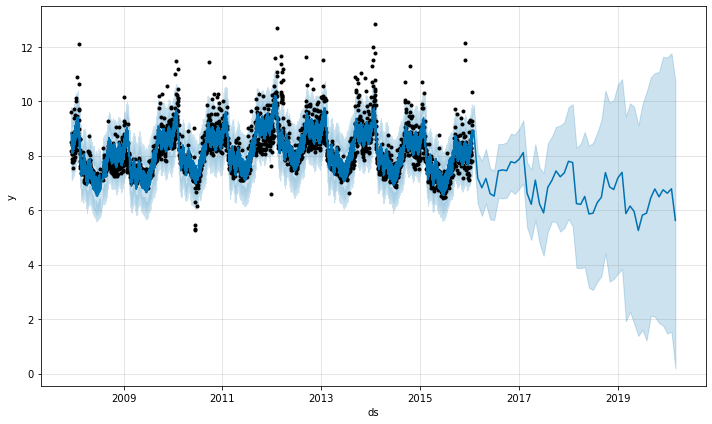

In [3]:
#The past may not be indicative of the future. Let's adjust the uncertainty intervals.
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = Prophet(interval_width=0.95).fit(df).predict(future)
fig = m.plot(forecast)

In [5]:
#Replace MAP estimation with MCMC sampling. Not recommended in Windows as there are upstream issues in PyStan for Windows and note that more observations will increase processing time.
m = Prophet(mcmc_samples=3)
forecast = m.fit(df).predict(future)

INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
WARNING - Maximum (flat) parameter count (1000) exceeded: skipping diagnostic tests for n_eff and Rhat.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
WARNING - 8 of 8 iterations ended with a divergence (100 %).
WARNING - Try running with adapt_delta larger than 0.8 to remove the divergences.


C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensio

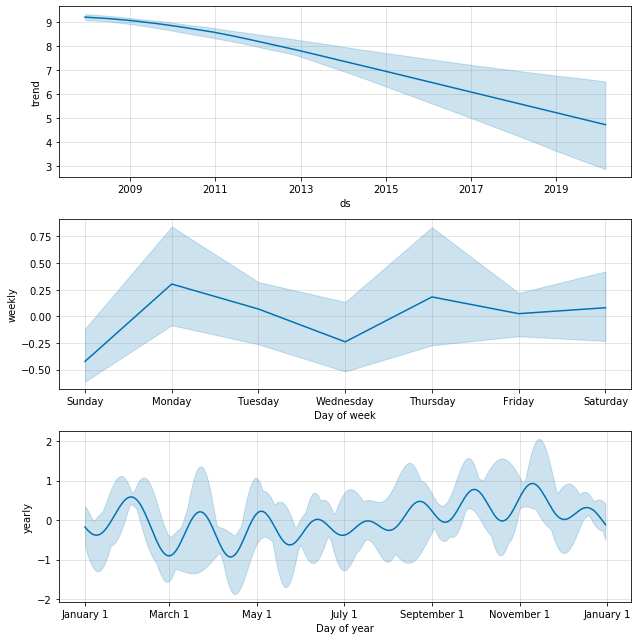

In [6]:
#Seasonlity is now captured as a percentage of the trend
fig = m.plot_components(forecast)